In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


df = pd.read_csv("dataset_manifest.csv")


In [2]:
num_classes = df['item_type'].nunique()
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['item_type'], random_state=42)


train_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    train_df, x_col="image_path", y_col="item_type",
    target_size=(128, 128), batch_size=32, class_mode="categorical"
)
print(train_gen.class_indices)

Found 9588 validated image filenames belonging to 20 classes.
{'FreshApple': 0, 'FreshBanana': 1, 'FreshBellpepper': 2, 'FreshCarrot': 3, 'FreshCucumber': 4, 'FreshMango': 5, 'FreshOrange': 6, 'FreshPotato': 7, 'FreshStrawberry': 8, 'FreshTomato': 9, 'RottenApple': 10, 'RottenBanana': 11, 'RottenBellpepper': 12, 'RottenCarrot': 13, 'RottenCucumber': 14, 'RottenMango': 15, 'RottenOrange': 16, 'RottenPotato': 17, 'RottenStrawberry': 18, 'RottenTomato': 19}


In [3]:
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df, x_col="image_path", y_col="item_type",
    target_size=(128, 128), batch_size=32, class_mode="categorical", shuffle=False
)



Found 2398 validated image filenames belonging to 20 classes.


In [4]:
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])



In [5]:
model.compile(optimizer=Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])



In [6]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)



In [7]:
model.fit(
    train_gen,
    epochs=50,
    validation_data=test_gen,
    callbacks=[early_stop]
)

loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc:.4f}")
# model.save("model2.h5") LEGACY FORMAT
model.save("model3.keras")

Epoch 1/50


c:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 103s 337ms/step - accuracy: 0.1106 - loss: 3.1569 - val_accuracy: 0.4454 - val_loss: 2.0085
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 303ms/step - accuracy: 0.3650 - loss: 2.0510 - val_accuracy: 0.5826 - val_loss: 1.5858
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 300ms/step - accuracy: 0.4800 - loss: 1.6376 - val_accuracy: 0.6280 - val_loss: 1.3106
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 89s 298ms/step - accuracy: 0.5529 - loss: 1.3954 - val_accuracy: 0.6551 - val_loss: 1.1904
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 337ms/step - accuracy: 0.6009 - loss: 1.2121 - val_accuracy: 0.6822 - val_loss: 1.0918
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 338ms/step - accuracy: 0.6391 - loss: 1.0951 - val_accuracy: 0.7014 - val_loss: 1.0077
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 101s 336ms/step - accuracy: 0.6658 - loss: 0.9759 - val_accuracy: 0.7077 - val_loss: 1.0026
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 95s 316ms/step - accuracy: 0.6940 - loss: 0.9067 -

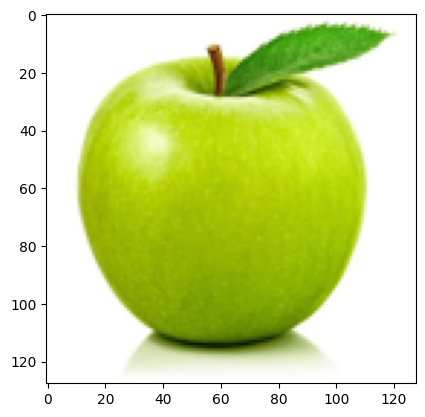

In [89]:
import matplotlib.pyplot as plt
from PIL import Image

# image=Image.open(r'test_data/img1.jpeg')
# image=Image.open(r'test_data/img2.jpeg')
# image=Image.open(r'test_data/img3.jpg')
# image=Image.open(r'test_data/img4.jpeg')
# image=Image.open(r'test_data/img5.jpg')
# image=Image.open(r'test_data/img6.jpg')
# image=Image.open(r'test_data/img7.jpeg')
# image=Image.open(r'test_data/img8.jpeg')
# image=image.resize(128,128)
image=image.resize((128,128))
image_rgb = image.convert('RGB')
# Image._show(image)
plt.imshow(image)

In [90]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model1=load_model('model3.keras')

# Convert RGBA image to RGB


In [85]:
import numpy as np

In [86]:
    # Define your class names in the same order as they were during training
class_names = ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot',
    'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato',
    'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana',
    'RottenBellpepper', 'RottenCarrot', 'RottenCucumber', 'RottenMango',
    'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']


In [87]:
pred= model.predict(tf.expand_dims(tf.keras.preprocessing.image.img_to_array(image_rgb)/255,0))
predicted_class_index = np.argmax(pred[0])


predicted_class_name = class_names[predicted_class_index]
print(f"The predicted class is: {predicted_class_name}")
print(f"Prediction probabilities: {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
The predicted class is: RottenBellpepper
Prediction probabilities: [1.0869706e-02 1.8678994e-01 4.5313682e-02 1.0444599e-02 2.1920847e-02
 1.1210528e-02 7.6527103e-05 1.7497083e-05 3.5282259e-03 4.3411762e-03
 3.4987375e-02 1.0622228e-03 6.5872544e-01 1.7170764e-04 7.5096954e-03
 1.1512344e-03 1.5597919e-03 6.8694653e-06 5.2169387e-05 2.6084218e-04]


In [88]:
image_array = tf.keras.preprocessing.image.img_to_array(image_rgb) / 255.0
image_batch = tf.expand_dims(image_array, 0)
pred = model.predict(image_batch)
probabilities = pred[0]

# --- Modification to show all class predictions ---
class_probabilities = list(zip(class_names, probabilities))
sorted_class_probabilities = sorted(class_probabilities, key=lambda item: item[1], reverse=True)

# --- Print the sorted results ---
print("Predictions (sorted by confidence):")
for class_name, probability in sorted_class_probabilities:
    print(f"- {class_name}: {probability*100:.2f}%")

# --- Print the top prediction ---
top_predicted_class_name = sorted_class_probabilities[0][0]
top_probability = sorted_class_probabilities[0][1]
print(f"\nTop predicted class: {top_predicted_class_name} ({top_probability*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predictions (sorted by confidence):
- RottenBellpepper: 65.87%
- FreshBanana: 18.68%
- FreshBellpepper: 4.53%
- RottenApple: 3.50%
- FreshCucumber: 2.19%
- FreshMango: 1.12%
- FreshApple: 1.09%
- FreshCarrot: 1.04%
- RottenCucumber: 0.75%
- FreshTomato: 0.43%
- FreshStrawberry: 0.35%
- RottenOrange: 0.16%
- RottenMango: 0.12%
- RottenBanana: 0.11%
- RottenTomato: 0.03%
- RottenCarrot: 0.02%
- FreshOrange: 0.01%
- RottenStrawberry: 0.01%
- FreshPotato: 0.00%
- RottenPotato: 0.00%

Top predicted class: RottenBellpepper (65.87%)
